# Hash Table
05113009 哲學四 吳家瑩

* [Hash Table 與 Hash Function 原理](#Hash-Table-與-Hash-Function-原理)
* [流程圖](#流程圖)
* [程式碼](#程式碼)
* [學習歷程](#學習歷程)
    - [第一次測試](#❗️第一次完整測試)
    - [第二次測試](#❗️第二次)
    - [第三次測試](#❗️第三次)
    - [第四次測試](#❗️第四次)
    - [第五次測試](#❗️第五次)
    - [第六次測試](#❗️第六次)
    - [第七次測試](#❗️最終測試)
    - [👑最終測試](#🏆🏆🏆-真的最終測試)
* [參考資料](#參考資料)

<br>

## Hash Table 與 Hash Function 原理

* Hash Function 是將輸入的值轉譯成另外的值，特性為快速、單向性、不可逆性，只有輸入的值能得到輸出的值，輸出的值無法反向得到輸入的值。且好的Hash Function 不易出現碰撞，所以當出現碰撞卻沒抑制的話，會使資料更難查詢。<br>
* Hash Table 是一種儲存(key,value)的資料結構，一個key對應一個value，key可以想像成標籤，要找到這筆value就必須要有key才找得到。<br>
* Hash 時間複雜度： O(1)     <      ( *array: O(n), binary search tree: O(logn)~O(n)* )<br>
* Chaining概念：可能有不同的資料分配到同一組，所以用linked list將其都串在一起，可以解決碰撞問題。

在Hash Function設計不良的狀況下，有可能會都分到同一組，導致連接很長的linked list，這樣就失去Hash的優勢了，並且可能會發生碰撞，所以為了減少這種狀況的發生，可以使用Cryptographic Hash Function，利用加密的方式來避免碰撞的發生，所以一般都會使用Cryptographic Hash Function的方法。
Cryptographic Hash Function有很多不同的演算法，其中包含常見的MD5、SHA等。且可以提高Table的大小，使資料分佈的更分散且平均，以減少碰撞發生。


Hash常用於：搜尋引擎、檔案校對碼、使用者密碼儲存比對。<br>
只需要將使用者輸入的密碼hash過後再進行比對，也可以將不公開的密碼加密後存入Hash Table裡，這樣既可以比對密碼是否正確，也可防止密碼外洩的可能性。<br>
Hash功能：新增、刪除、查詢

<br>

## 流程圖

作業流程圖：

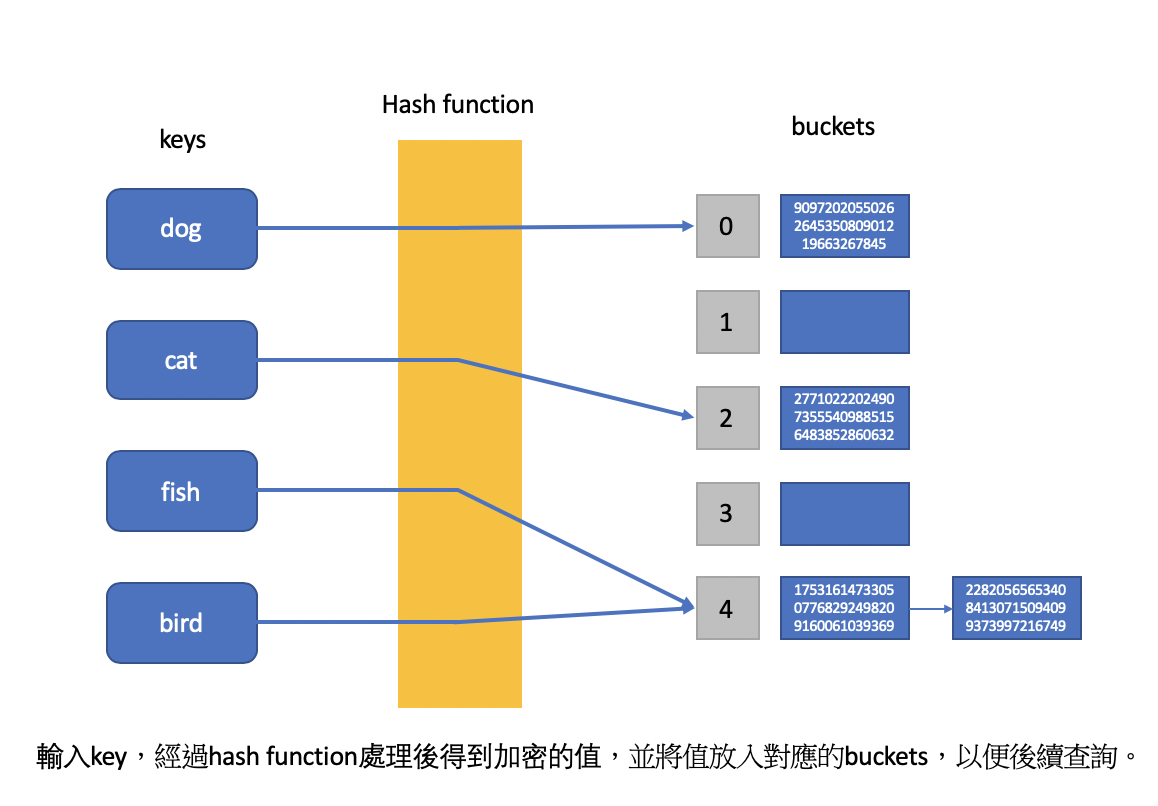

In [522]:
from IPython.display import Image
Image(filename='hash table 流程圖.png',width = '70%')

<br>

其他參考流程圖：
[圖片來源](https://kknews.cc/code/5vla3p8.html)

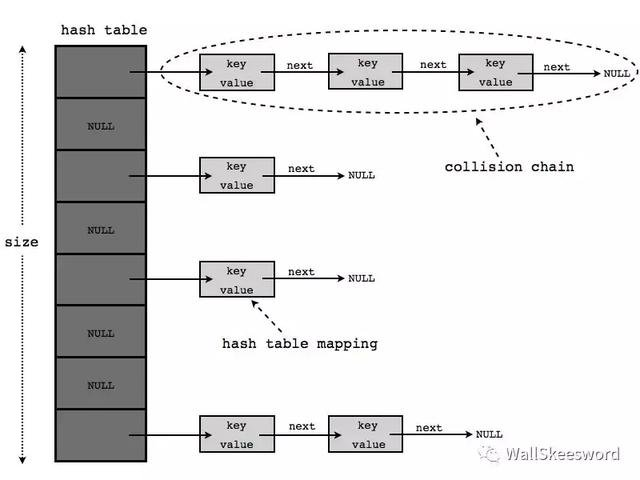

In [523]:
Image(filename='1.jpg',width = '70%')

<br>

## 程式碼

In [418]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        if self.data[index] == None:
            self.data[index] = ListNode(temp)
            return
        else:
            node = self.data[index]
            while node:
                if node.val == temp:
                    return
                if node.next == None:
                    node.next = ListNode(temp)
                    return
                node = node.next

                  
        """
        :type key: str
        :rtype: None
        """
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        node = self.data[index]
        prenode = node 
        
        if node:
            if node.val == temp:
                if node.next:
                    self.data[index] = node.next
                    return
                else:
                    self.data[index] = None
                    return
        
        while node:
            if node.val == temp:
                if node.next:
                    prenode.next = node.next
                    return
                else:
                    prenode.next = None
                    return
            prenode = node
            node = node.next        
        

        
        """
        :type key: str
        :rtype: None
        """
    def contains(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        node = self.data[index]

        while node:
            if node.val == temp:
                return True
            node = node.next
        return False       
        
        
        """
        :type key: str
        :rtype: bool(True or False)
        """
    def MD5(self, key):
        from Crypto.Hash import MD5
        a = MD5.new(key.encode('utf-8'))
        return a.hexdigest()
    



<br>

## 學習歷程

#### ➡️先了解MD5

In [66]:
from Crypto.Hash import MD5

In [67]:
h = MD5.new()

In [68]:
print(h.hexdigest())

d41d8cd98f00b204e9800998ecf8427e


In [69]:
h.update('sample data'.encode('utf-8'))

In [70]:
print(h.hexdigest())

26e078b87fdaa3206ab8bf63a6096c07


In [71]:
h.update('sample data'.encode('utf-8'))

In [72]:
print(h.hexdigest())

a8b3faa60f83d428a64b6c5363cdd91e


👆經過多次更新編碼會改變，所以編碼可能有時間性，要小心避免同樣的字編碼不同的問題。

In [31]:
a = MD5.new('sample data'.encode('utf-8'))

In [32]:
print(a.hexdigest())

26e078b87fdaa3206ab8bf63a6096c07


In [34]:
v = MD5.new()
v.update('sample data'.encode('utf-8'))
print(v.hexdigest())

26e078b87fdaa3206ab8bf63a6096c07


<br>

#### ➡️先了解[None]*3的意思

In [44]:
a = [None]*3

In [45]:
a[2] = 2

In [46]:
a

[None, None, 2]

#### 1⃣️第一次測試add

In [48]:
a = MyHashSet()

In [49]:
a.add('dog')

In [51]:
a.data

[<__main__.ListNode at 0x1060286d8>, None, None, None, None]

判斷dog 餘數是否為0

In [57]:
h = MD5.new('dog'.encode('utf-8'))

In [58]:
print(h.hexdigest())

06d80eb0c50b49a509b49f2424e8c805


In [59]:
int(h.hexdigest(),16)%5

0

#### 2⃣️第一次測試remove

In [80]:
a = MyHashSet()

In [81]:
a.add('dog')

In [82]:
a.data

[<__main__.ListNode at 0x1060289b0>, None, None, None, None]

In [83]:
a.remove('dog')

In [84]:
a.data

[None, None, None, None, None]

成功刪除 👍

<br>


### ❗️第一次完整測試

In [87]:
a = MyHashSet()

In [88]:
a.add('dog')

In [89]:
a.add('cat')

In [90]:
a.data

 None,
 None,
 None]

In [91]:
a.add('dog')

👆同樣的key，不重複添加

In [92]:
a.data

 None,
 None,
 None]

In [93]:
a.add('aaa')

In [94]:
a.data

 None,
 None,
 None]

In [95]:
int(MD5.new('dog'.encode('utf-8')).hexdigest(),16) % 5

0

In [96]:
a.contains('aaa')

False

In [97]:
a.contains('dog')

True

In [98]:
a.contains('cat')

True

In [99]:
a.add('aaa')

In [100]:
a.contains('aaa')

False

👆加入後面的linked list失敗 ❌

In [ ]:
    def add(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        if self.data[index] == None:
            self.data[index] = ListNode(temp)
            return self.data[index]
        else:
            node = self.data[index].next
            while node:
                if node.val == temp:
                    return
                node = node.next
            node = ListNode(temp)
            return node

👆加入失敗的程式碼，需要進行修改 ❌

In [101]:
a.remove('dog')

In [102]:
a.data

[None, None, <__main__.ListNode at 0x1074716d8>, None, None]

In [103]:
a.contains('dog')

False

<br>

### ❗️第二次

In [115]:
a = MyHashSet()

In [116]:
a.add('dog')

In [117]:
a.add('cat')

In [118]:
a.add('aaa')

In [119]:
a.data

 None,
 None,
 None]

In [120]:
a.contains('dog')

True

In [121]:
a.contains('cat')

True

In [122]:
a.contains('aaa')

True

In [123]:
a.remove('aaa')

AttributeError: 'NoneType' object has no attribute 'next'

In [ ]:
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        
        if self.data[index].val == temp:
            if self.data[index].next:
                self.data[index] = self.data[index].next
            else:
                self.data[index] = None
        else:
            node = self.data[index].next
            while node:
                if node.val == temp:
                    if node.next:
                        node = node.next
                    else:
                        node = None
                node = node.next



👆無法刪除第一個以後的值，需要修改 ❌

<br>

### ❗️第三次

In [136]:
a = MyHashSet()

In [137]:
a.add('dog')

In [138]:
a.add('cat')

In [139]:
a.add('aaa')

In [140]:
a.data

 None,
 None,
 None]

In [141]:
a.contains('dog')

True

In [142]:
a.contains('cat')

True

In [143]:
a.contains('aaa')

True

In [144]:
a.remove('aaa')

In [145]:
a.contains('aaa')

True

👆刪除失敗，沒有成功 ❌

In [ ]:
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        
        node = self.data[index]
        while node:
            if node.val == temp:
                if node.next:
                    node = node.next
                    return
                else:
                    node = None
                    return
            if node.next:
                node = node.next

👆錯誤程式碼，進行修改 ❌

<br>

### ❗️第四次

In [147]:
a = MyHashSet()

In [148]:
a.add('dog')

In [149]:
a.add('cat')

In [150]:
a.add('aaa')

In [151]:
a.data

 None,
 None,
 None]

In [152]:
a.contains('dog')

True

In [153]:
a.contains('cat')

True

In [154]:
a.contains('aaa')

True

In [155]:
a.remove('aaa')

In [156]:
a.contains('aaa')

False

In [157]:
a.remove('dog')

In [158]:
a.contains('dog')

False

In [159]:
a.contains('a')

False

In [160]:
a.contains('cat')

True

In [161]:
a.data

 None,
 None,
 None]

In [169]:
a.data[0] == None

False

In [165]:
a.data[0].val == None

True

In [167]:
a.data[0].next == None

True

👆雖然值刪除了，但是此位置非為None❌，因此需要再修改程式碼

In [170]:
a.add('dog')

In [171]:
a.data[0].val == None

True

In [172]:
a.data[0].next == None

False

由於第一個node只是沒有值，並非為空，所以dog加到下一個位置去了，雖然不影響查詢與儲存，但是久而久之會越佔越多空間

In [ ]:
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        
        node = self.data[index]
        while node:
            if node.val == temp:
                if node.next:
                    node = node.next
                    return
                else:
                    node.val = None
                    return
            if node.next:
                node = node.next

👆錯誤的程式碼❌

<br>

### ❗️第五次

In [174]:
a = MyHashSet()

In [175]:
a.add('dog')

In [176]:
a.add('cat')

In [177]:
a.add('aaa')

In [178]:
a.data

 None,
 None,
 None]

In [179]:
a.contains('dog')

True

In [180]:
a.contains('cat')

True

In [181]:
a.contains('aaa')

True

In [182]:
a.remove('aaa')

AttributeError: 'NoneType' object has no attribute 'next'

In [ ]:
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        
        if self.data[index].val == temp:
            if self.data[index].next:
                self.data[index] = self.data[index].next
            else:
                self.data[index] = None
        else:
            node = self.data[index]
            while node.next:
                if node.next.val == temp:
                    if node.next.next:
                        node.next = node.next.next
                    else:
                        node.next = None
                if node.next.next:
                    node = node.next

又錯了😂 ，再來修改程式碼試試。❌

<br>

### ❗️第六次

In [184]:
a = MyHashSet()

In [185]:
a.add('dog')

In [186]:
a.add('cat')

In [187]:
a.add('aaa')

In [188]:
a.data

 None,
 None,
 None]

In [189]:
a.contains('dog')

True

In [190]:
a.contains('cat')

True

In [191]:
a.contains('aaa')

True

In [192]:
a.remove('aaa')

In [193]:
a.contains('aaa')

False

In [194]:
a.remove('dog')

In [195]:
a.contains('dog')

False

In [196]:
a.contains('a')

False

In [197]:
a.contains('cat')

True

In [198]:
a.data

[None, None, <__main__.ListNode at 0x1074b36d8>, None, None]

In [199]:
a.data[0] == None

True

In [200]:
a.data[0].val == None

AttributeError: 'NoneType' object has no attribute 'val'

In [201]:
a.data[0].next == None

AttributeError: 'NoneType' object has no attribute 'next'

👆成功，因為None不會有value，也不會有next，所以出錯是對的<br>
<br>
來全部測試看看 😎

<br>

### ❗️最終測試

In [202]:
a = MyHashSet()

In [203]:
a.data

[None, None, None, None, None]

In [204]:
a.contains('dog')

False

空的，所以當然沒有dog

In [205]:
a.add('dog')

In [206]:
a.contains('dog')

True

新增了dog，確定新增成功 👍

In [207]:
a.add('dog')

In [208]:
a.remove('dog')

In [209]:
a.contains('dog')

False

因為重複的值不新增，所以就算再新增一次hash set裡面也只有一個dog，然後刪除過後，裡面就不包含dog，代表完全刪除。

In [210]:
a.add('aaa')

In [211]:
a.contains('aaa')

True

確認aaa新增成功。

In [212]:
a.data[0].val = MD5.new('aaa'.encode('utf-8')).hexdigest()

AttributeError: 'NoneType' object has no attribute 'val'

❗️這邊有三個錯：

    第一，因為程式碼錯誤或是其他的因素導致，所以此處的確不是aaa 🌰__(最後有發現是我一直以為aaa的餘數是0，但事實上是2)__
    第二，沒有將16進制轉成10進制，所以就算這裡的值的確是加密後的aaa，也不會對
    第三，我要寫的應該是判斷式，所以不該是 = ，而是 == 才對

In [213]:
a.data

[None, None, <__main__.ListNode at 0x106028c88>, None, None]

In [214]:
int(MD5.new('dog'.encode('utf-8')).hexdigest(),16) % 5

0

In [216]:
a.data[0].next == None

AttributeError: 'NoneType' object has no attribute 'next'

因為None不會有next。

In [217]:
a.contains('aaa')

True

確定aaa存在hash set裡，但是它到底在哪❓

In [218]:
a.add('aaa')

In [219]:
a.data

[None, None, <__main__.ListNode at 0x106028c88>, None, None]

In [220]:
a.remove('cat')

In [221]:
a.data

[None, None, <__main__.ListNode at 0x106028c88>, None, None]

突然發現刪除cat以後，[2]的位置還有東西，莫非cat沒有刪除成功❓❗️

In [222]:
a.contains('cat')

False

In [223]:
a.data[2].val == None 

False

確認cat刪除成功，並且這個位置上確定是有值的。

In [224]:
a.data[2].val == MD5.new('aaa'.encode('utf-8')).hexdigest()

False

咦❗️怎麼錯了❓

In [225]:
MD5.new('aaa'.encode('utf-8')).hexdigest()

'47bce5c74f589f4867dbd57e9ca9f808'

In [227]:
int(MD5.new('aaa'.encode('utf-8')).hexdigest(),16) % 5

2

真相大白，不知道我為什麼一直覺得我上面有算過 aaa 的餘數為0 ， 結果是2，難怪不是新增在[0]的位置，差點沒被自己蠢哭 😂 <br>
除此之外，我的判斷式打錯了，應該是"=="，結果我打成"="，難怪會錯，還有我忘記轉成10進制。😂😂😂<br>
不過沒關係，既然知道錯在哪了，修改後重新出發 🚗

<br>

## 🏆🏆🏆 真的最終測試

In [228]:
a = MyHashSet()

In [229]:
a.data

[None, None, None, None, None]

確定皆為空的，裡面沒有任何值

In [230]:
a.add('dog')

In [231]:
a.add('cat')

In [232]:
a.add('aaa')

In [233]:
a.add('bird')

In [234]:
a.add('fish')

In [235]:
a.add('bbb')

In [236]:
a.add('ccc')

新增一些值進入這個hash set

In [237]:
a.data

 None,
 None,

In [238]:
a.contains('dog') and a.contains('cat') and a.contains('aaa') and a.contains('bird') and a.contains('fish') and a.contains('bbb') and a.contains('ccc')

True

👆判斷hash set裡是否有剛剛新增的這些值，回傳為true，代表這些值都包含在裡面。

In [239]:
int(MD5.new('dog'.encode('utf-8')).hexdigest(),16) % 5

0

In [240]:
int(MD5.new('cat'.encode('utf-8')).hexdigest(),16) % 5

2

In [241]:
int(MD5.new('aaa'.encode('utf-8')).hexdigest(),16) % 5

2

In [242]:
int(MD5.new('bird'.encode('utf-8')).hexdigest(),16) % 5

4

In [243]:
int(MD5.new('fish'.encode('utf-8')).hexdigest(),16) % 5

4

In [244]:
int(MD5.new('bbb'.encode('utf-8')).hexdigest(),16) % 5

2

In [245]:
int(MD5.new('ccc'.encode('utf-8')).hexdigest(),16) % 5

4

吸取之前的教訓，所以先判斷一下每一個key的餘數為多少，判斷每一個key的位置。

    0-dog
    1-
    2-cat-aaa-bbb
    3-
    4-bird-fish-ccc

In [246]:
a.data[0].val == int(MD5.new('dog'.encode('utf-8')).hexdigest(),16)

True

In [247]:
a.data[2].next.val == int(MD5.new('aaa'.encode('utf-8')).hexdigest(),16)

True

In [249]:
a.data[4].next.next.val == int(MD5.new('ccc'.encode('utf-8')).hexdigest(),16)

True

隨便檢驗其中幾個值的位置是否跟我想的一樣。<br>
結果證明跟我想的一樣 😄

In [250]:
a.remove('dog')

In [251]:
a.remove('cat')

In [252]:
a.remove('fish')

In [254]:
a.contains('dog')

False

In [255]:
a.contains('cat')

False

In [256]:
a.contains('fish')

False

確定刪除的值都成功刪除了

如果刪除成功後的位置：

    0-
    1-
    2-aaa-bbb
    3-
    4-bird-ccc

In [257]:
a.data[0] == None

True

In [258]:
a.data[1] == None

True

In [259]:
a.data[2].val == int(MD5.new('aaa'.encode('utf-8')).hexdigest(),16)

True

In [260]:
a.data[2].next.val == int(MD5.new('bbb'.encode('utf-8')).hexdigest(),16)

True

In [261]:
a.data[3] == None

True

In [262]:
a.data[4].val == int(MD5.new('bird'.encode('utf-8')).hexdigest(),16)

True

In [263]:
a.data[4].next.val == int(MD5.new('ccc'.encode('utf-8')).hexdigest(),16)

True

確認每一個位置皆與上述相同。<br>
刪除後，再來新增看看結果會不會與我預期的相符。👇

In [275]:
a.add('dog')

In [276]:
a.add('ddd')

In [277]:
a.add('eee')

In [278]:
int(MD5.new('ddd'.encode('utf-8')).hexdigest(),16) %5

2

In [279]:
int(MD5.new('eee'.encode('utf-8')).hexdigest(),16) %5

4

In [280]:
a.contains('dog') and a.contains('ddd') and a.contains('eee')

True

確認三者皆包含在hash set裡，新增成功。 👍 😄

預期結果位置：

    0-dog
    1-
    2-aaa-bbb-ddd
    3-
    4-bird-ccc-eee

In [282]:
a.data

 None,
 None,

In [281]:
a.data[0].val == int(MD5.new('dog'.encode('utf-8')).hexdigest(),16)

True

In [283]:
a.data[2].next.next.val == int(MD5.new('ddd'.encode('utf-8')).hexdigest(),16)

True

In [284]:
a.data[4].next.next.val == int(MD5.new('eee'.encode('utf-8')).hexdigest(),16)

True

根據以上驗證，代表結果與我想的一樣。非常成功 🎉🎉🎉

In [ ]:
    def remove(self, key):
        temp = self.MD5(key)
        temp = int(temp,16)
        index = temp % self.capacity
        
        if self.data[index].val == temp:
            if self.data[index].next:
                self.data[index] = self.data[index].next
            else:
                self.data[index] = None
        else:
            node = self.data[index]
            while node.next:
                if node.next.val == temp:
                    if node.next.next:
                        node.next = node.next.next
                        return
                    else:
                        node.next = None
                        return
                if node.next.next:
                    node = node.next

1203 演習課有了新的想法，所以更改了上面的程式碼，上面的程式碼太複雜了。更改後的程式碼在[程式碼](#程式碼)

<br>

## 參考資料

* https://www.youtube.com/watch?v=oqzStHk36PI&feature=youtu.be 程式碼參考<br>
* https://blog.kdchang.cc/2017/08/15/learning-programming-and-coding-with-python-list-tuple-dict-set/ 觀念參考<br>
* https://www.itread01.com/content/1542966064.html 觀念參考<br>
* http://codepad.org/NxRlGE3H 程式碼格式範例<br>
* https://docs.google.com/presentation/d/e/2PACX-1vT1HO9Nl475k2bR0l1x8_Tr4V5Wzx0BEqp9bpmHckvj8kTeJehhYVlOJUDVPhLQm6kjGCJ_sLMSBUw5/pub?start=false&loop=false&delayms=3000&slide=id.g7565e27c53_0_43 觀念與流程圖參考 <br>
* https://hackmd.io/@EW34LLeXTra2Oikg0WEQ5Q/HJln3jU_e?type=view 觀念參考 <br>
* http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html 觀念參考 <br>
* https://blog.techbridge.cc/2017/01/21/simple-hash-table-intro/ 觀念參考<br>
* https://kknews.cc/code/5vla3p8.html 流程圖

[回到頂端](#Hash-Table)